# Velocity metrics
Goal is to use ground truth files extract pose data calculate velocity using this data.

In [1]:
from copy import copy
import os
import numpy as np
import sys
import pandas as pd 

In [2]:
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 
import entropy as en
import tkinter as tk
from tkinter import filedialog

def select_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename()
    return file_path
def select_dir():
    root = tk.Tk()
    root.withdraw()
    dir_path = filedialog.askdirectory()
    return dir_path

In [3]:
euroc_path = select_dir()

In [4]:
# select a EuRoC dataset:
euroc_mh1_gt = pd.read_csv(euroc_path + "/mh1/data.csv")
euroc_mh4_gt = pd.read_csv(euroc_path + "/mh4/data.csv")
euroc_mh5_gt = pd.read_csv(euroc_path + "/mh5/data.csv")

In [5]:
# print dataframe to figure out what cols are containing velocity:
euroc_mh1_gt

,#timestamp,p_RS_R_x [m],p_RS_R_y [m],p_RS_R_z [m],q_RS_w [],q_RS_x [],q_RS_y [],q_RS_z [],v_RS_R_x [m s^-1],v_RS_R_y [m s^-1],v_RS_R_z [m s^-1],b_w_RS_S_x [rad s^-1],b_w_RS_S_y [rad s^-1],b_w_RS_S_z [rad s^-1],b_a_RS_S_x [m s^-2],b_a_RS_S_y [m s^-2],b_a_RS_S_z [m s^-2]
0,1403636580838555648,4.688319,-1.786938,0.783338,0.534108,-0.153029,-0.827383,-0.082152,-0.027876,0.033207,0.800006,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
1,1403636580843555328,4.688177,-1.786770,0.787350,0.534640,-0.152990,-0.826976,-0.082863,-0.029272,0.033992,0.804771,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
2,1403636580848555520,4.688028,-1.786598,0.791382,0.535178,-0.152945,-0.826562,-0.083605,-0.030043,0.034999,0.808240,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
3,1403636580853555456,4.687878,-1.786421,0.795429,0.535715,-0.152884,-0.826146,-0.084391,-0.030230,0.035853,0.810462,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
4,1403636580858555648,4.687727,-1.786240,0.799484,0.536244,-0.152821,-0.825731,-0.085213,-0.029905,0.036316,0.811406,-0.003172,0.021267,0.078502,-0.025266,0.136696,0.075593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,1403636762723555584,4.575397,-1.940927,0.625653,0.579374,-0.042467,-0.813699,0.020497,-0.144929,-0.057693,-0.293219,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36378,1403636762728555520,4.574676,-1.941212,0.624175,0.579591,-0.042072,-0.813579,0.019925,-0.143544,-0.056428,-0.297881,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36379,1403636762733555456,4.573957,-1.941492,0.622673,0.579754,-0.041647,-0.813499,0.019369,-0.144037,-0.055375,-0.302814,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404
36380,1403636762738555392,4.573240,-1.941764,0.621155,0.579935,-0.041213,-0.813404,0.018851,-0.142618,-0.053455,-0.304619,-0.003238,0.021339,0.078290,-0.025497,0.136267,0.076404


In [6]:
# cols 6:9 are containing our desired values.
euroc_mh1_v = euroc_mh1_gt.iloc[:,8:11]
euroc_mh4_v = euroc_mh4_gt.iloc[:,8:11]
euroc_mh5_v = euroc_mh5_gt.iloc[:,8:11]

<AxesSubplot:>

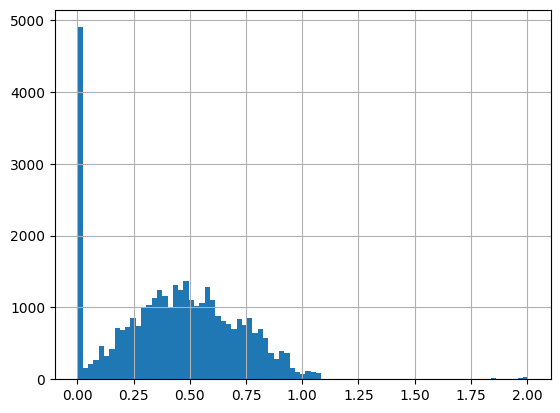

In [7]:
# can find average magnitude of velocity
euroc_mh1_v_mag = euroc_mh1_v.apply(np.linalg.norm, axis=1)
euroc_mh1_v_mag.hist(bins=dp.feedman_bins(euroc_mh1_v_mag))

<AxesSubplot:>

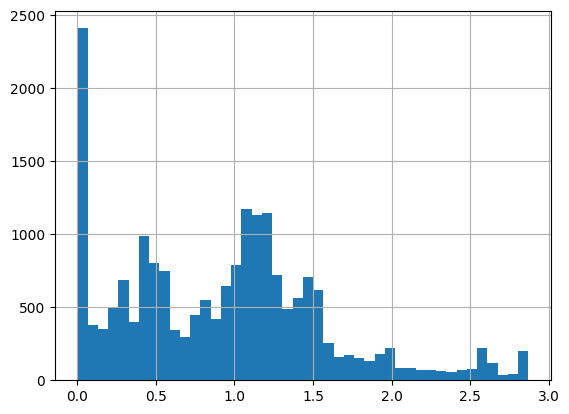

In [8]:
euroc_mh4_v_mag = euroc_mh4_v.apply(np.linalg.norm, axis=1)
euroc_mh4_v_mag.hist(bins=dp.feedman_bins(euroc_mh4_v_mag))

<AxesSubplot:>

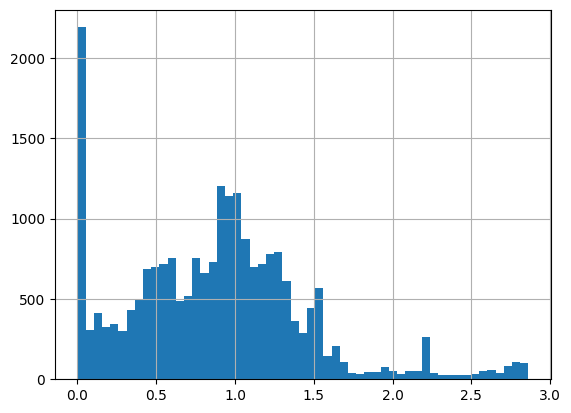

In [9]:
euroc_mh5_v_mag = euroc_mh5_v.apply(np.linalg.norm, axis=1)
euroc_mh5_v_mag.hist(bins=dp.feedman_bins(euroc_mh5_v_mag))

In [10]:
# calculate entropy of data:
e_mh1 = en.calculate_shannon_entropy(euroc_mh1_v_mag)
e_mh4 = en.calculate_shannon_entropy(euroc_mh4_v_mag)
e_mh5 = en.calculate_shannon_entropy(euroc_mh5_v_mag)

In [11]:
print("Entropy for mh1: ", e_mh1)
print("Entropy for mh4: ", e_mh4)
print("Entropy for mh5: ", e_mh5)

Entropy for mh1:  15.150827288424683
Entropy for mh4:  14.269784159754545
Entropy for mh5:  14.439051680586159
